# Concept Labeling Interface

**Instructions**: 
1. Enter your name in Cell 2
2. Run Cell 3 to load data
3. Run Cell 4 repeatedly to label windows one by one
4. Labels are automatically saved to `labeling_tracker.csv`


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


## Progress Tracking


---
## User 21 Team Inter-Rater Reliability Analysis

Analyzing agreement between 4 team members who labeled the same 25 windows from user 21.


In [5]:
# Load all team member labels for user 21
import pandas as pd
import numpy as np
from sklearn.metrics import cohen_kappa_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("="*70)
print("LOADING USER 21 TEAM LABELS")
print("="*70)

# Load each team member's labels
labelers = ['harveer', 'maria', 'piotr', 'tudor']
dfs = {}

for labeler in labelers:
    file_path = f'user_21/window_labels_{labeler}.csv'
    df = pd.read_csv(file_path)
    dfs[labeler] = df
    print(f"✓ {labeler.capitalize()}: {len(df)} windows")

print(f"\n✓ All labels loaded successfully!")
print(f"  Total windows: {len(dfs['harveer'])}")
print(f"  Labelers: {len(labelers)}")


LOADING USER 21 TEAM LABELS
✓ Harveer: 25 windows
✓ Maria: 25 windows
✓ Piotr: 25 windows
✓ Tudor: 25 windows

✓ All labels loaded successfully!
  Total windows: 25
  Labelers: 4


## Inter-Rater Reliability Check


In [6]:
# Calculate pairwise Cohen's Kappa between all labelers
print("\n" + "="*70)
print("PAIRWISE INTER-RATER RELIABILITY (COHEN'S KAPPA)")
print("="*70)
print("\nInterpretation:")
print("  κ > 0.80: Excellent agreement")
print("  κ 0.60-0.80: Good agreement")
print("  κ 0.40-0.60: Moderate agreement")
print("  κ < 0.40: Poor agreement (needs discussion!)")
print("\n" + "="*70)

concepts = ['periodicity', 'temporal_stability', 'coordination']
kappa_results = {concept: {} for concept in concepts}
all_kappas = []

for i, labeler1 in enumerate(labelers):
    for labeler2 in labelers[i+1:]:
        print(f"\n{labeler1.upper()} vs {labeler2.upper()}:")
        print("-" * 50)
        
        df1 = dfs[labeler1]
        df2 = dfs[labeler2]
        
        # Merge on window_idx to ensure same windows
        merged = pd.merge(df1[['window_idx'] + concepts], 
                          df2[['window_idx'] + concepts],
                          on='window_idx', 
                          suffixes=('_1', '_2'))
        
        pair_kappas = []
        for concept in concepts:
            col1 = f"{concept}_1"
            col2 = f"{concept}_2"
            
            # Convert to integers: multiply by 2 to get 0, 1, 2 (from 0.0, 0.5, 1.0)
            labels1 = (merged[col1] * 2).astype(int)
            labels2 = (merged[col2] * 2).astype(int)
            
            kappa = cohen_kappa_score(labels1, labels2)
            kappa_results[concept][f"{labeler1}_vs_{labeler2}"] = kappa
            pair_kappas.append(kappa)
            
            # Interpretation
            if kappa > 0.80:
                level = "✓ Excellent"
            elif kappa > 0.60:
                level = "✓ Good"
            elif kappa > 0.40:
                level = "⚠ Moderate"
            else:
                level = "✗ Poor"
            
            print(f"  {concept.replace('_', ' ').title():20s}: κ = {kappa:.3f}  {level}")
        
        avg_kappa = np.mean(pair_kappas)
        all_kappas.append(avg_kappa)
        print(f"  {'Average':20s}: κ = {avg_kappa:.3f}")

print("\n" + "="*70)
print(f"OVERALL TEAM AGREEMENT: κ = {np.mean(all_kappas):.3f}")
print("="*70)

if np.mean(all_kappas) < 0.60:
    print("\n⚠️  WARNING: Agreement is below 0.60!")
    print("   Recommended actions:")
    print("   1. Review labeling_guidelines.md together")
    print("   2. Discuss specific disagreements (see next cell)")
    print("   3. Re-calibrate and re-label if necessary")



PAIRWISE INTER-RATER RELIABILITY (COHEN'S KAPPA)

Interpretation:
  κ > 0.80: Excellent agreement
  κ 0.60-0.80: Good agreement
  κ 0.40-0.60: Moderate agreement
  κ < 0.40: Poor agreement (needs discussion!)


HARVEER vs MARIA:
--------------------------------------------------
  Periodicity         : κ = 0.195  ✗ Poor
  Temporal Stability  : κ = -0.272  ✗ Poor
  Coordination        : κ = 0.272  ✗ Poor
  Average             : κ = 0.065

HARVEER vs PIOTR:
--------------------------------------------------
  Periodicity         : κ = 0.522  ⚠ Moderate
  Temporal Stability  : κ = -0.103  ✗ Poor
  Coordination        : κ = 0.043  ✗ Poor
  Average             : κ = 0.154

HARVEER vs TUDOR:
--------------------------------------------------
  Periodicity         : κ = 0.465  ⚠ Moderate
  Temporal Stability  : κ = 0.590  ⚠ Moderate
  Coordination        : κ = 0.072  ✗ Poor
  Average             : κ = 0.376

MARIA vs PIOTR:
--------------------------------------------------
  Periodicity    

In [7]:
# Summary by concept
print('\n' + '='*70)
print('AVERAGE KAPPA BY CONCEPT')
print('='*70)
for concept in concepts:
    concept_kappas = list(kappa_results[concept].values())
    avg = np.mean(concept_kappas)
    
    if avg > 0.80:
        level = "✓ Excellent"
    elif avg > 0.60:
        level = "✓ Good"
    elif avg > 0.40:
        level = "⚠ Moderate"
    else:
        level = "✗ Poor"
    
    print(f'{concept.replace("_", " ").title():20s}: κ = {avg:.3f}  {level}')

print('\n' + '='*70)



AVERAGE KAPPA BY CONCEPT
Periodicity         : κ = 0.441  ⚠ Moderate
Temporal Stability  : κ = -0.006  ✗ Poor
Coordination        : κ = 0.185  ✗ Poor



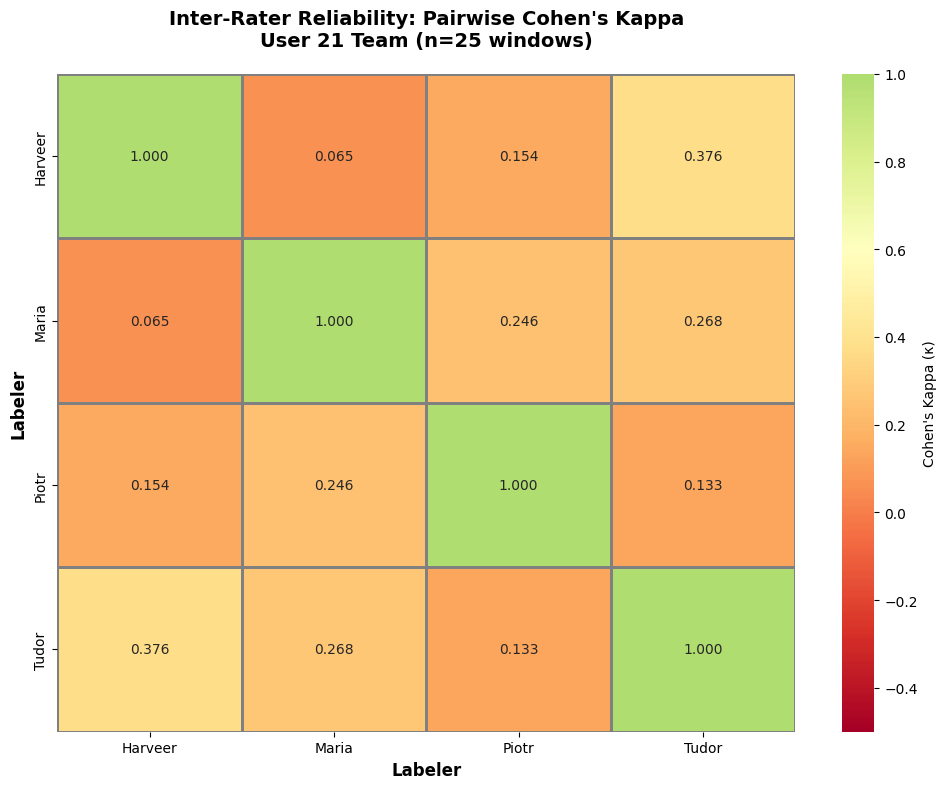

✓ Heatmap saved as inter_rater_reliability_heatmap.png


In [8]:
# Create visualization heatmaps
import matplotlib.pyplot as plt
import seaborn as sns

# Create kappa matrix for overall heatmap
n_labelers = len(labelers)
kappa_matrix = np.zeros((n_labelers, n_labelers))

for i, labeler1 in enumerate(labelers):
    for j, labeler2 in enumerate(labelers):
        if i == j:
            kappa_matrix[i, j] = 1.0  # Perfect agreement with self
        elif i < j:
            df1 = dfs[labeler1]
            df2 = dfs[labeler2]
            
            merged = pd.merge(df1[['window_idx'] + concepts], 
                              df2[['window_idx'] + concepts],
                              on='window_idx', 
                              suffixes=('_1', '_2'))
            
            # Calculate average kappa across all concepts
            pair_kappas = []
            for concept in concepts:
                col1 = f'{concept}_1'
                col2 = f'{concept}_2'
                labels1 = (merged[col1] * 2).astype(int)
                labels2 = (merged[col2] * 2).astype(int)
                kappa = cohen_kappa_score(labels1, labels2)
                pair_kappas.append(kappa)
            
            avg_kappa = np.mean(pair_kappas)
            kappa_matrix[i, j] = avg_kappa
            kappa_matrix[j, i] = avg_kappa  # Symmetric

# Create overall heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(kappa_matrix, 
            annot=True, 
            fmt='.3f',
            cmap='RdYlGn',
            center=0.6,
            vmin=-0.5, 
            vmax=1.0,
            xticklabels=[l.capitalize() for l in labelers],
            yticklabels=[l.capitalize() for l in labelers],
            cbar_kws={'label': 'Cohen\'s Kappa (κ)'},
            linewidths=1,
            linecolor='gray')

plt.title('Inter-Rater Reliability: Pairwise Cohen\'s Kappa\nUser 21 Team (n=25 windows)', 
          fontsize=14, fontweight='bold', pad=20)
plt.xlabel('Labeler', fontsize=12, fontweight='bold')
plt.ylabel('Labeler', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.savefig('inter_rater_reliability_heatmap.png', dpi=300, bbox_inches='tight')
plt.show()

print('✓ Heatmap saved as inter_rater_reliability_heatmap.png')


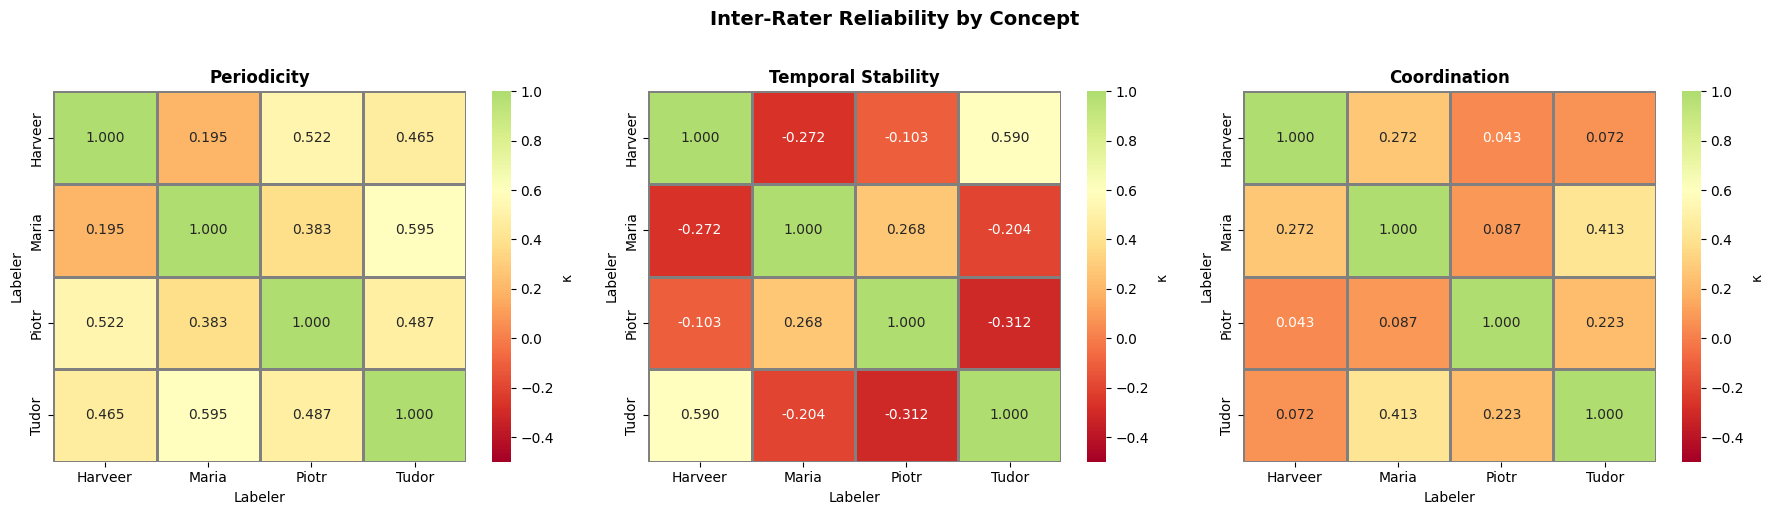

✓ Concept-specific heatmap saved as inter_rater_reliability_by_concept.png


In [9]:
# Create concept-specific heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for idx, concept in enumerate(concepts):
    concept_matrix = np.zeros((n_labelers, n_labelers))
    
    for i, labeler1 in enumerate(labelers):
        for j, labeler2 in enumerate(labelers):
            if i == j:
                concept_matrix[i, j] = 1.0
            elif i < j:
                df1 = dfs[labeler1]
                df2 = dfs[labeler2]
                
                merged = pd.merge(df1[['window_idx', concept]], 
                                  df2[['window_idx', concept]],
                                  on='window_idx', 
                                  suffixes=('_1', '_2'))
                
                labels1 = (merged[f'{concept}_1'] * 2).astype(int)
                labels2 = (merged[f'{concept}_2'] * 2).astype(int)
                kappa = cohen_kappa_score(labels1, labels2)
                
                concept_matrix[i, j] = kappa
                concept_matrix[j, i] = kappa
    
    sns.heatmap(concept_matrix, 
                annot=True, 
                fmt='.3f',
                cmap='RdYlGn',
                center=0.6,
                vmin=-0.5, 
                vmax=1.0,
                xticklabels=[l.capitalize() for l in labelers],
                yticklabels=[l.capitalize() for l in labelers],
                cbar_kws={'label': 'κ'},
                linewidths=1,
                linecolor='gray',
                ax=axes[idx])
    
    axes[idx].set_title(concept.replace('_', ' ').title(), fontsize=12, fontweight='bold')
    axes[idx].set_xlabel('Labeler', fontsize=10)
    axes[idx].set_ylabel('Labeler', fontsize=10)

plt.suptitle('Inter-Rater Reliability by Concept', fontsize=14, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('inter_rater_reliability_by_concept.png', dpi=300, bbox_inches='tight')
plt.show()

print('✓ Concept-specific heatmap saved as inter_rater_reliability_by_concept.png')
